<a href="https://colab.research.google.com/github/NaDaGyeong/ml-for-AI/blob/main/Final_project/novozymes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# XGBoost - LB 0.30+ CV 0.30+ Train With Kaggle Data!
# Download 5000 Single Point Mutations and 200 PDB Files!
In this notebook version 14, we show you how to process Kaggle's train data and train a model using Kaggle's train data. This is an exciting accomplishment. Currently, as of today, all public notebooks better than LB 0.200 **do not use** Kaggle train data. Instead they use models and techniques from the internet to predict mutation stability. In this notebook we use only Kaggle train and achieve LB 0.30+

The notebook you are reading is the first notebook to use only Kaggle train data and score over LB 0.200! (It achieves LB 0.307 single model). Many Kagglers have contributed to making this a success! Including Robert Hatch, GreySnow, Rope on Mars, Vladimir Slaykovskiy, Jinyuan Sun, Kaggleqrdl, Lucas Morin, Moth! It is quite tricky to utilize Kaggle's train data. The process is explained in detail [here][5] and summarized in the diagram below:

![](https://raw.githubusercontent.com/cdeotte/Kaggle_Images/main/Oct-2022/k_train3.png)

In previous notebook versions, we built a pipeline to train XGB using features extracted from protein sequence and structure. Also in previous notebook versions, we demonstrated how to download and use external data. In notebook version 13 we added transformer embedding features. In notebook version 11, we download 5000 Single Point Mutations and 200 PDB files from Jinyuan Sun's GitHub [here][1] and discussion [here][4]. We then train a model to predict `dTm` from single point mutations with `dTm` targets and achieve 5-Fold CV Spearman correlation coefficient 0.26 on `dTm`. Next we use this model to predict a holdout dataset's `ddG` and achieve Spearman correlation coefficient 0.26 on `ddG`. Finally we predict Kaggle's test data using this model and achieve LB 0.192. In notebook version 12, we train with both dTm and ddG targets (mixed together) and achieve dTm CV 0.194, ddG CV 0.460, LB 0.209. Notebook version 13 achieves single model LB 0.3! In notebook version 13, we submit the ensemble of versions 8, 11, 12, and 13 and achieve LB 0.34!

An advantage of dowloading data is that we can train with PDB files and then utilize Kaggle's PDB test file during inference. But note we train with PDB files from Protein Data Bank and Kaggle provides PDB file from Alpha Fold for inference. These PDB files were **not** created in the same way. See discussion [here][2]. In order to have inference match training, we load our own test data wild type PDB file created from the internet as described [here][3]. This new PDB file has `b_factor` more similar to the real `b_factor` that we train on. However `atom_df` rows containing Hydrogen atoms are still different (between AlphaFold PDBs and Protein Data Bank PDBs), so be careful with feature engineering. If we submit this real `b_factor` (which isn't Alpha Fold's `pLDDT`) it scores LB 0.139 by itself. Our XGB model achieves a better LB, so it means that our model is learning something!

![](https://raw.githubusercontent.com/cdeotte/Kaggle_Images/main/Oct-2022/t_model.png)

# Notes
This notebook is a work in progress. The most helpful aspects of this notebook is that it shows (1) how to use Kaggle's train data, (2) how to extract features from ESM transformer, and (3) how to download 5000 more mutations from the internet and their corresponding 200 PDB files. Specifically 4000 of these mutations, have `ddG` targets and 1000 of these mutations have `dTm` targets. We must decide how to best use this external data and the two types of targets. Furthermore we must be careful training with Protein Data Bank PDB and inferring with AlphaFold PDB. 

* **Versions 1-6** use Kaggle's PDB with `b_factor` column different than Protein Data Bank's PDB `b_factor` column, so we can ignore those `submission.csv`.
* **Version 7 LB 0.146** trains/KFold-validates on `ddG` and holdout-validates on `dTM` and uses an updated PDB for inference with a `b_factor` column that is similar to training data. However many features still do not transfer well from train PDB to infer PDB because the Protein Data Bank's PDB `atom_df` dataframe excludes many hydrogen atoms. Therefore feature engineering needs to be updated. We need to only use rows with `atom_name` isin `['N','H','CA','O']` when counting atoms and/or creating features from `x_coord`, `y_coord`, `z_coord`. (Discussion [here][2])
* **Version 8 LB 0.173** trains/Kfold-validates on `dTm` and holdout-validates on `ddG`. Uses correct `b_factor` in both train and infer. Uses features that don't work well for train and infer (because of atom PDB differences). Furthermore Version 8 model scores LB 0.173 by itself, but Version 8 notebook submits a 50/50 ensemble of version 7 and version 8 which has benefits of train on both `ddG` and `ddT` and achieves LB 0.196.
* **Version 9-11 LB LB 0.192**  trains/Kfold-validates on `dTm` and holdout-validates on `ddG`. Achieves CV 0.260 on both targets. Uses features that exclude hydrogen atoms in PDB since Alpha Fold PDB `atom_df` contains more hydrogen atom rows than corresponding Protein Data Bank PDBs. Also uses features that should be stable between train and test. 
* **Version 12 LB 0.209** trains/Kfold-validates on all 5000 mutations! It trains with mixture of rank normalized `dTm` and `ddG` targets. Achieves CV 0.194 on `dTM` proteins and CV 0.460 on `ddG` proteins. Uses same features as versions 9-11 (but more train data and both targets). Furthermore Version 12 model scores LB 0.209 by itself, but Version 12 notebook submits a 33/33/33 ensemble of version 8, 11, 12 and achieves LB 0.298 woohoo!
* **Version 13 LB 0.300** trains/Kfold-validates on all 5000 mutations! It trains with mixture of rank normalized `dTm` and `ddG` targets. Achieves CV 0.233 on `dTM` proteins and CV 0.619 on `ddG` proteins. Amazing `ddG` CV score! Uses same features as versions 12-13 and adds additional transformer embedding features. Furthermore Version 14 model scores LB 0.300 by itself! but Version 14 notebook submits a 50/50 ensemble of version 12 and 14 and achieves LB ???
* **Version 14 LB 0.307** Woohoo! We finally trained a model and achieved a good CV LB using only Kaggle train data. This is a huge milestone which took collaboration from many Kagglers and 2 weeks of time. This single model achieves CV 0.34 LB 0.31. The LB score posted on version 14 is better than 0.31 because it is the ensemble of notebook version 14 with previous notebook versions 13, 12, 11, 8, and 7. Each previous version adds diversity by training with different data and/or features.
* **Version 15** In version 15 which has not been created yet, we plan to demonstrate how to use ESM transformer to create mutation probability features and entropy features! Stay tuned...

[1]: https://github.com/JinyuanSun/mutation-stability-data
[2]: https://www.kaggle.com/competitions/novozymes-enzyme-stability-prediction/discussion/356920
[3]: https://www.kaggle.com/competitions/novozymes-enzyme-stability-prediction/discussion/356182#1968210
[4]: https://www.kaggle.com/competitions/novozymes-enzyme-stability-prediction/discussion/356182
[5]: https://www.kaggle.com/competitions/novozymes-enzyme-stability-prediction/discussion/358320

In [ ]:
# DEFINE WHAT TO TRAIN WITH (and KFOLD VALIDATE) VERSUS HOLDOUT VALIDATE WITH
# ADD WORDS "kaggle.csv", "jin_tm.csv", "jin_train.csv", "jin_test.csv" to lists below
# IF YOU ADD MORE DATASETS, ADD THOSE WORDS TOO

KFOLD_SOURCES = ['kaggle.csv']
HOLDOUT_SOURCES = ['jin_tm.csv','jin_train.csv','jin_test.csv']

# IF WILD TYPE GROUP HAS FEWER THAN THIS MANY MUTATION ROWS REMOVE THEM
EXCLUDE_CT_UNDER = 25 

# IF WE TRAIN WITH ALPHA FOLD'S PDBS WE MUST INFER WITH PLDDT = TRUE
# KAGGLE.CSV USES ALPHA FOLD PDB, SO SET BELOW TO TRUE WITH KAGGLE.CSV
# JIN.CSV EXTERNAL DATA USES PROTEIN DATA BANK, SO SET BELOW TO FALSE WITH JIN DATA
USE_PLDDT_INFER = True

In [ ]:
import os, numpy as np, gc, seaborn as sns
from scipy.stats import spearmanr, pearsonr, rankdata
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('display.max_columns', 500)

# Transform Kaggle Train Data into Mutation CSV
Kaggle's `train.csv` cannot be used as is. Each row has one protein. Instead we need to convert the dataframe where each row has one wild type protein and one single point mutation protein and target `dTm` (i.e. delta `Tm`). Then we can more readily train with the data to predict Kaggle's `test.csv`. This is explained in discussion [here][1].

Robert Hatch has processed the train data and found pairs of wild type and mutation in his notebook [here][2] with discussion [here][3]. We will load his output. GreySnow has made 73 of 78 train's wild type protein PDB's available in his dataset [here][7] with discussion [here][4] using code from Vladimir [here][5] and [here][6]. We will load his output.

Note that Robert finds 4195 pairs (in Kaggle train data) which include 78 wild types. We will filter this below. From each group involving one wild type, we will only keep the rows from the most common `data_source` and `pH` pair. Furthermore, we remove rows belonging to a single `data_source` `pH` pair where all `Tm` targets are the same. And we remove 4 out of 78 groups where GreySnow and Vladimir did not find the PDB file. We saved our processed mutation CSV as `kaggle_train.csv` so you can use it in other notebooks.

[1]: https://www.kaggle.com/competitions/novozymes-enzyme-stability-prediction/discussion/358320
[2]: https://www.kaggle.com/code/roberthatch/novo-train-data-contains-wildtype-groups/notebook
[3]: https://www.kaggle.com/competitions/novozymes-enzyme-stability-prediction/discussion/358156
[4]: https://www.kaggle.com/competitions/novozymes-enzyme-stability-prediction/discussion/359284
[5]: https://www.kaggle.com/code/vslaykovsky/nesp-alphafold-v2-exact-match-data
[6]: https://www.kaggle.com/code/vslaykovsky/nesp-alphafold2-all-close-matches
[7]: https://www.kaggle.com/datasets/shlomoron/train-wildtypes-af

In [ ]:
# https://www.kaggle.com/code/roberthatch/novo-train-data-contains-wildtype-groups/notebook
kaggle = pd.read_csv('../input/novo-train-data-contains-wildtype-groups/train_wildtype_groups.csv')
print('Before processing Robert dataframe shape:', kaggle.shape )
kaggle.head()

Before processing Robert dataframe shape: (4195, 8)


,seq_id,protein_sequence,pH,data_source,tm,x,group,wildtype
0,18020,MNAFEMLRIDERLRLKIYKDTEGYYTIGIGHLLTKSPSLNAAKSEL...,2.0,10.1021/bi00535a054,38.1,164,0,MNIFEMLRIDERLRLKIYKDTEGYYTIGIGHLLTKSPSLNAAKSEL...
1,18021,MNAFEMLRIDERLRLKIYKDTEGYYTIGIGHLLTKSPSLNAAKSEL...,4.2,NaN,53.3,164,0,MNIFEMLRIDERLRLKIYKDTEGYYTIGIGHLLTKSPSLNAAKSEL...
2,18022,MNAFEMLRIDERLRLKIYKDTEGYYTIGIGHLLTKSPSLNAAKSEL...,2.0,10.1038/334406a0,38.1,164,0,MNIFEMLRIDERLRLKIYKDTEGYYTIGIGHLLTKSPSLNAAKSEL...
3,18023,MNAFEMLRIDERLRLKIYKDTEGYYTIGIGHLLTKSPSLNAAKSEL...,6.5,10.1038/334406a0,62.9,164,0,MNIFEMLRIDERLRLKIYKDTEGYYTIGIGHLLTKSPSLNAAKSEL...
4,18060,MNCFEMLRIDERLRLKIYKDTEGYYTIGIGHLLTKSPSLNAAKSEL...,2.0,NaN,41.9,164,0,MNIFEMLRIDERLRLKIYKDTEGYYTIGIGHLLTKSPSLNAAKSEL...


In [ ]:
kaggle['id'] = kaggle.pH.astype('str') + '_' + kaggle.group.astype('str')
kaggle['ct'] = kaggle.groupby('id').id.transform('count')
#kaggle['n'] = kaggle.groupby('id').tm.transform('nunique')
#kaggle = kaggle.loc[kaggle.n>1]
kaggle = kaggle.sort_values(['group','ct'],ascending=[True,False])
KEEP = kaggle.groupby('group').id.agg('first').values
kaggle = kaggle.loc[kaggle.id.isin(KEEP)]

def find_mut(row):
    mut = row.protein_sequence
    seq = row.wildtype
    same = True
    for i,(x,y) in enumerate(zip(seq,mut)):
        if x!=y: 
            same = False
            break
    if not same:
        row['WT'] = seq[i]
        row['position'] = i+1
        row['MUT'] = mut[i]
    else:
        row['WT'] = 'X'
        row['position'] = -1   
        row['MUT'] = 'X'     
    return row

grp = [f'GP{g:02d}' for g in kaggle.group.values]
kaggle['PDB'] = grp
kaggle = kaggle.apply(find_mut,axis=1)
kaggle = kaggle.loc[kaggle.position!=-1]
kaggle['base'] = kaggle.groupby('group').tm.transform('mean')
kaggle['dTm'] = kaggle.tm - kaggle.base
kaggle = kaggle.rename({'wildtype':'sequence','protein_sequence':'mutant_seq'},axis=1)
COLS = ['PDB','WT','position','MUT','dTm','sequence','mutant_seq']
kaggle = kaggle[COLS]

# https://www.kaggle.com/datasets/shlomoron/train-wildtypes-af
alphafold = pd.read_csv('../input/train-wildtypes-af/alpha_fold_df.csv')
dd = {}
for s in kaggle.sequence.unique():
    tmp = alphafold.loc[alphafold.af2_sequence==s,'af2id']
    if len(tmp)>0: c = tmp.values[0].split(':')[1]
    else: c = np.nan
    dd[s] = c
    
kaggle['CIF'] = kaggle.sequence.map(dd)
kaggle = kaggle.loc[kaggle.CIF.notnull()].reset_index(drop=True)
kaggle.to_csv('kaggle_train.csv',index=False)
print('After processing Robert dataframe shape:', kaggle.shape )
kaggle.head()

After processing Robert dataframe shape: (2556, 8)


,PDB,WT,position,MUT,dTm,sequence,mutant_seq,CIF
0,GP01,L,89,A,2.28642,MLVMTEYLLSAGICMAIVSILLIGMAISNVSKGQYAKRFFFFATSC...,MLVMTEYLLSAGICMAIVSILLIGMAISNVSKGQYAKRFFFFATSC...,AF-P00644-F1
1,GP01,T,95,C,1.48642,MLVMTEYLLSAGICMAIVSILLIGMAISNVSKGQYAKRFFFFATSC...,MLVMTEYLLSAGICMAIVSILLIGMAISNVSKGQYAKRFFFFATSC...,AF-P00644-F1
2,GP01,T,95,C,0.28642,MLVMTEYLLSAGICMAIVSILLIGMAISNVSKGQYAKRFFFFATSC...,MLVMTEYLLSAGICMAIVSILLIGMAISNVSKGQYAKRFFFFATSC...,AF-P00644-F1
3,GP01,T,95,S,2.48642,MLVMTEYLLSAGICMAIVSILLIGMAISNVSKGQYAKRFFFFATSC...,MLVMTEYLLSAGICMAIVSILLIGMAISNVSKGQYAKRFFFFATSC...,AF-P00644-F1
4,GP01,T,95,S,3.88642,MLVMTEYLLSAGICMAIVSILLIGMAISNVSKGQYAKRFFFFATSC...,MLVMTEYLLSAGICMAIVSILLIGMAISNVSKGQYAKRFFFFATSC...,AF-P00644-F1


In [ ]:
kaggle['source'] = 'kaggle.csv'
kaggle['ddG'] = np.nan
kaggle = kaggle.rename({'WT':'wildtype','MUT':'mutation'},axis=1)
kaggle = kaggle.sort_values(['PDB','position']).reset_index(drop=True)
kaggle.head()

,PDB,wildtype,position,mutation,dTm,sequence,mutant_seq,CIF,source,ddG
0,GP01,L,89,A,2.28642,MLVMTEYLLSAGICMAIVSILLIGMAISNVSKGQYAKRFFFFATSC...,MLVMTEYLLSAGICMAIVSILLIGMAISNVSKGQYAKRFFFFATSC...,AF-P00644-F1,kaggle.csv,NaN
1,GP01,T,95,C,1.48642,MLVMTEYLLSAGICMAIVSILLIGMAISNVSKGQYAKRFFFFATSC...,MLVMTEYLLSAGICMAIVSILLIGMAISNVSKGQYAKRFFFFATSC...,AF-P00644-F1,kaggle.csv,NaN
2,GP01,T,95,C,0.28642,MLVMTEYLLSAGICMAIVSILLIGMAISNVSKGQYAKRFFFFATSC...,MLVMTEYLLSAGICMAIVSILLIGMAISNVSKGQYAKRFFFFATSC...,AF-P00644-F1,kaggle.csv,NaN
3,GP01,T,95,S,2.48642,MLVMTEYLLSAGICMAIVSILLIGMAISNVSKGQYAKRFFFFATSC...,MLVMTEYLLSAGICMAIVSILLIGMAISNVSKGQYAKRFFFFATSC...,AF-P00644-F1,kaggle.csv,NaN
4,GP01,T,95,S,3.88642,MLVMTEYLLSAGICMAIVSILLIGMAISNVSKGQYAKRFFFFATSC...,MLVMTEYLLSAGICMAIVSILLIGMAISNVSKGQYAKRFFFFATSC...,AF-P00644-F1,kaggle.csv,NaN


In [ ]:
kaggle.PDB.unique()

array(['GP01', 'GP02', 'GP03', 'GP04', 'GP06', 'GP07', 'GP08', 'GP09',
       'GP10', 'GP11', 'GP12', 'GP13', 'GP14', 'GP15', 'GP16', 'GP17',
       'GP18', 'GP19', 'GP20', 'GP21', 'GP22', 'GP23', 'GP24', 'GP25',
       'GP26', 'GP27', 'GP28', 'GP29', 'GP30', 'GP31', 'GP32', 'GP33',
       'GP34', 'GP35', 'GP36', 'GP37', 'GP38', 'GP39', 'GP40', 'GP41',
       'GP42', 'GP43', 'GP44', 'GP45', 'GP46', 'GP48', 'GP49', 'GP50',
       'GP51', 'GP52', 'GP53', 'GP54', 'GP55', 'GP57', 'GP58', 'GP59',
       'GP60', 'GP62', 'GP63', 'GP64', 'GP65', 'GP66', 'GP67', 'GP68',
       'GP69', 'GP70', 'GP71', 'GP72', 'GP73', 'GP74', 'GP75', 'GP76',
       'GP77'], dtype=object)

In [ ]:
# THE FOLLOWING PROTEINS SEQUENCES CANNOT BE ALIGNED BETWEEN CSV AND PDB FILE (not sure why)
#bad = [f for f in df.PDB.unique() if len(f)>4]
#bad += ['1LVE', '2IMM', '2RPN', '1BKS', '1BLC', '1D5G', '1KDX', '1OTR', '3BN0', '3D3B', '3HHR', '3O39']
#bad += ['3BDC','1AMQ','1X0J','1TPK','1GLM','1RHG','3DVI','1RN1','1QGV'] 
#bad += ['1SVX','4E5K'] 
#print(f'We will ignore mutations from {len(bad)} PDB files')
bad = []

In [ ]:
"""
os.system('mkdir downloaded_pdb')
for p in [f for f in df.PDB.unique() if f not in bad]:
    if p[:2]=='GP': continue # skip kaggle CIFba
    os.system(f'cd downloaded_pdb; wget https://files.rcsb.org/download/{p}.pdb') 
"""

"\nos.system('mkdir downloaded_pdb')\nfor p in [f for f in df.PDB.unique() if f not in bad]:\n    if p[:2]=='GP': continue # skip kaggle CIFba\n    os.system(f'cd downloaded_pdb; wget https://files.rcsb.org/download/{p}.pdb') \n"

# Feature Engineer
Below is 3D plot of Kaggle's test data protein structure from PDB file rendered by py3Dmol (with docs [here][1]). For each of our 5000 mutation downloaded train data, we also have protein structure since we downloaded 200 PDB files from Protein Data Bank. And when using Kaggle train data, we now have PDB files! Therefore when we feature engineer, we can create features from both protein sequence, protein structure, and amino acids. In this notebook, we use the following features:
* Protein Structure features (from atom positions in PDB file)
* Protein Sequence features
* Amino Acid features 
* Transformer ESM embeddings

thanks @kaggleqrdl for his ESM starter notebook [here][2]

[1]: https://3dmol.csb.pitt.edu/doc/$3Dmol.GLViewer.html
[2]: https://www.kaggle.com/code/kaggleqrdl/esm-quick-start-lb237

## Protein Structure Features

In [ ]:
!pip install py3Dmol -q
import py3Dmol 
with open("../input/novozymes-enzyme-stability-prediction/wildtype_structure_prediction_af2.pdb") as ifile:
    protein = "".join([x for x in ifile])
#view = py3Dmol.view(query='pdb:1DIV', width=800, height=600)
view = py3Dmol.view(width=800, height=600) 
view.addModelsAsFrames(protein)
style = {'cartoon': {'color': 'spectrum'},'stick':{}}
view.setStyle({'model': -1},style) 
view.zoom(0.12)
view.rotate(235, {'x':0,'y':1,'z':1})
view.spin({'x':-0.2,'y':0.5,'z':1},1)
view.show()

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

## Amino Acid Features
For amino acid features, we use the CSV provided by Moth @alejopaullier [here][1]. Lucas Morin shows their usefulness [here][2]

[1]: https://www.kaggle.com/datasets/alejopaullier/aminoacids-physical-and-chemical-properties
[2]: https://www.kaggle.com/code/lucasmorin/nesp-changes-eda-and-baseline

In [ ]:
# BIOPANDAS PDB READER
!pip install biopandas -q
from biopandas.pdb import PandasPdb
from biopandas.mmcif import PandasMmcif
aa_map = {'VAL': 'V', 'PRO': 'P', 'ASN': 'N', 'GLU': 'E', 'ASP': 'D', 'ALA': 'A', 'THR': 'T', 'SER': 'S',
          'LEU': 'L', 'LYS': 'K', 'GLY': 'G', 'GLN': 'Q', 'ILE': 'I', 'PHE': 'F', 'CYS': 'C', 'TRP': 'W',
          'ARG': 'R', 'TYR': 'Y', 'HIS': 'H', 'MET': 'M'}
aa_map_2 = {x:y for x,y in zip(np.sort(list(aa_map.values())),np.arange(20))}
aa_map_2['X'] = 20

# https://www.kaggle.com/datasets/alejopaullier/aminoacids-physical-and-chemical-properties
aa_props = pd.read_csv('../input/aminoacids-physical-and-chemical-properties/aminoacids.csv').set_index('Letter')
PROPS = ['Molecular Weight', 'Residue Weight', 'pKa1', 'pKb2', 'pKx3', 'pl4', 
         'H', 'VSC', 'P1', 'P2', 'SASA', 'NCISC']
print('Amino Acid properties dataframe. Shape:', aa_props.shape )
aa_props.head(22)

Amino Acid properties dataframe. Shape: (22, 21)


,Name,Abbr,Molecular Weight,Molecular Formula,Residue Formula,Residue Weight,pKa1,pKb2,pKx3,pl4,H,VSC,P1,P2,SASA,NCISC,carbon,hydrogen,nitrogen,oxygen,sulfur
Letter,,,,,,,,,,,,,,,,,,,,,
A,Alanine,Ala,89.10,C3H7NO2,C3H5NO,71.08,2.34,9.69,NaN,6.00,0.62,27.5,8.1,0.046,1.181,0.007187,3,7,1,2,0
C,Cysteine,Cys,121.16,C3H7NO2S,C3H5NOS,103.15,1.96,10.28,8.18,5.07,0.29,44.6,5.5,0.128,1.461,-0.036610,3,7,1,2,1
D,Aspartic acid,Asp,133.11,C4H7NO4,C4H5NO3,115.09,1.88,9.60,3.65,2.77,-0.90,40.0,13.0,0.105,1.587,-0.023820,4,7,1,4,0
E,Glutamic acid,Glu,147.13,C5H9NO4,C5H7NO3,129.12,2.19,9.67,4.25,3.22,-0.74,62.0,12.3,0.151,1.862,0.006802,5,9,1,4,0
F,Phenylalanine,Phe,165.19,C9H11NO2,C9H9NO,147.18,1.83,9.13,NaN,5.48,1.19,115.5,5.2,0.290,2.228,0.037552,9,11,1,2,0
G,Glycine,Gly,75.07,C2H5NO2,C2H3NO,57.05,2.34,9.60,NaN,5.97,0.48,0.0,9.0,0.000,0.881,0.179052,2,5,1,2,0
H,Histidine,His,155.16,C6H9N3O2,C6H7N3O,137.14,1.82,9.17,6.00,7.59,-0.40,79.0,10.4,0.230,2.025,-0.010690,6,9,3,2,0
I,Isoleucine,Ile,131.18,C6H13NO2,C6H11NO,113.16,2.36,9.60,NaN,6.02,1.38,93.5,5.2,0.186,1.810,0.021631,6,13,1,2,0
K,Lysine,Lys,146.19,C6H14N2O2,C6H12N2O,128.18,2.18,8.95,10.53,9.74,-1.50,100.0,11.3,0.219,2.258,0.017708,6,14,2,2,0


## Transformer ESM Features
In order to convert amino acid sequences aka proteins into meaningful features, we will use embeddings from SOTA protein transformer. We use Facebook's pretrained protein transformer ESM (Evolutionary Scale Modeling) with research paper [here][1] and GitHub [here][2]. Kaggleqrdl provided a starter notebook [here][3]. In future notebook versions, we will show how to extract more feature engineering information from ESM including mutation probabilties and entropy!

[1]: https://www.biorxiv.org/content/10.1101/622803v4
[2]: https://github.com/facebookresearch/esm
[3]: https://www.kaggle.com/code/kaggleqrdl/esm-quick-start-lb237

In [ ]:
# https://github.com/facebookresearch/esm
!pip install fair-esm -q

# https://www.kaggle.com/code/kaggleqrdl/esm-quick-start-lb237
import torch, esm
t_model, alphabet = esm.pretrained.esm2_t33_650M_UR50D()
batch_converter = alphabet.get_batch_converter()
t_model.eval()  # disables dropout for deterministic results
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
t_model.to(device)

Downloading: "https://dl.fbaipublicfiles.com/fair-esm/models/esm2_t33_650M_UR50D.pt" to /root/.cache/torch/hub/checkpoints/esm2_t33_650M_UR50D.pt
Downloading: "https://dl.fbaipublicfiles.com/fair-esm/regression/esm2_t33_650M_UR50D-contact-regression.pt" to /root/.cache/torch/hub/checkpoints/esm2_t33_650M_UR50D-contact-regression.pt


ESM2(
  (embed_tokens): Embedding(33, 1280, padding_idx=1)
  (layers): ModuleList(
    (0): TransformerLayer(
      (self_attn): MultiheadAttention(
        (k_proj): Linear(in_features=1280, out_features=1280, bias=True)
        (v_proj): Linear(in_features=1280, out_features=1280, bias=True)
        (q_proj): Linear(in_features=1280, out_features=1280, bias=True)
        (out_proj): Linear(in_features=1280, out_features=1280, bias=True)
        (rot_emb): RotaryEmbedding()
      )
      (self_attn_layer_norm): LayerNorm((1280,), eps=1e-05, elementwise_affine=True)
      (fc1): Linear(in_features=1280, out_features=5120, bias=True)
      (fc2): Linear(in_features=5120, out_features=1280, bias=True)
      (final_layer_norm): LayerNorm((1280,), eps=1e-05, elementwise_affine=True)
    )
    (1): TransformerLayer(
      (self_attn): MultiheadAttention(
        (k_proj): Linear(in_features=1280, out_features=1280, bias=True)
        (v_proj): Linear(in_features=1280, out_features=1280, bia

### Embeddings
We input each train and test wildtype into our transformer and extract the last hidden layers activations. For each protein, this has shape `(1, len_protein_seq, 1280)`. We will save the full embeddings and the pooled embeddings for use later.

In [ ]:
# TRAIN AND TEST WILDTYPES
all_pdb = [f for f in kaggle.PDB.unique() if f not in bad]
base = 'VPVNPEPDATSVENVALKTGSGDSQSDPIKADLEVKGQSALPFDVDCWAILCKGAPNVLQRVNEKTKNSNRDRSGANKGPFKDPQKWGIKALPPKNPSWSAQDFKSPEEYAFASSLQGGTNAILAPVNLASQNSQGGVLNGFYSANKVAQFDPSKPQQTKGTWFQITKFTGAAGPYCKALGSNDKSVCDKNKNIAGDWGFDPAKWAYQYDEKNNKFNYVGK'
all_pdb_embed_pool = np.zeros((len(all_pdb)+1,1280))
all_pdb_embed_local = []
all_pdb_embed_tmp = []

# EXTRACT TRANSFORMER EMBEDDINGS FOR TRAIN AND TEST WILDTYPES
print('Extracting embeddings from proteins...')
for i,p in enumerate(all_pdb+['TEST']):
    
    # WILDTYPE SEQUENCE
    print(p,', ',end='')
    if p=='TEST': seq = base
    else: seq = kaggle.loc[kaggle.PDB==p,'sequence'].iloc[0]
        
    # EXTRACT EMBEDDINGS
    data = [("protein1", seq)]
    batch_labels, batch_strs, batch_tokens = batch_converter(data)
    batch_tokens = batch_tokens.to(device)
    with torch.no_grad():
        results = t_model(batch_tokens, repr_layers=[33])
    results = results["representations"][33].detach().cpu().numpy()
    
    # SAVE EMBEDDINGS
    all_pdb_embed_local.append(results)
    all_pdb_embed_pool[i,] = np.mean( results[0,:,:],axis=0 )
    
    # TEMPORARILY SAVE LOCAL MUTATION EMBEDDINGS
    tmp = kaggle.loc[kaggle.PDB==p,'position'].unique()
    if p=='TEST': tmp = np.random.choice(range(20,200),8,replace=False)
    if len(tmp)>8: tmp = np.random.choice(tmp,8,replace=False)
    for j in tmp: all_pdb_embed_tmp.append( results[0,j,:] )
        
    del batch_tokens, results
    gc.collect(); torch.cuda.empty_cache()

all_pdb_embed_tmp = np.stack(all_pdb_embed_tmp)

Extracting embeddings from proteins...
GP01 , GP02 , GP03 , GP04 , GP06 , GP07 , GP08 , GP09 , GP10 , GP11 , GP12 , GP13 , GP14 , GP15 , GP16 , GP17 , GP18 , GP19 , GP20 , GP21 , GP22 , GP23 , GP24 , GP25 , GP26 , GP27 , GP28 , GP29 , GP30 , GP31 , GP32 , GP33 , GP34 , GP35 , GP36 , GP37 , GP38 , GP39 , GP40 , GP41 , GP42 , GP43 , GP44 , GP45 , GP46 , GP48 , GP49 , GP50 , GP51 , GP52 , GP53 , GP54 , GP55 , GP57 , GP58 , GP59 , GP60 , GP62 , GP63 , GP64 , GP65 , GP66 , GP67 , GP68 , GP69 , GP70 , GP71 , GP72 , GP73 , GP74 , GP75 , GP76 , GP77 , TEST , 

### RAPIDS PCA
The transformer embeddings have dimension 1280. Since we only have a few thousand rows of train data, that is too many features to include all of them in our XGB model. Furthermore, we want to use local, pooling, and delta embeddings. Which would be 3x1280. To prevent our model from overfitting as a result of the "curse of dimensionality", we reduce the dimension of embeddings using RAPIDS PCA. 

In [ ]:
# REDUCE EMBEDDING DIM FROM 1280 TO 32 OR 16 WITH PCA
from cuml import PCA
pca_pool = PCA(n_components=32)
pca_embeds = pca_pool.fit_transform(all_pdb_embed_pool.astype('float32'))
pca_local = PCA(n_components=16)
pca_local.fit(all_pdb_embed_tmp.astype('float32'))
pdb_map = {x:y for x,y in zip(all_pdb,range(len(all_pdb)))}
pdb_map['kaggle'] = len(all_pdb)
del all_pdb_embed_tmp
_ = gc.collect()

## Feature Engineering Function

In [ ]:
# FEATURE ENGINEER FUNCTION
def get_new_row(atom_df, j, row):
    ##################
    # ATOM_DF - IS PDB FILE'S ATOM_DF
    # J - IS RESIDUE NUMBER WHICH IS TRAIN CSV POSITION PLUS OFFSET
    # ROW - IS ROW FROM DOWNLOADED TRAIN CSV
    ##################
        
    dd = None
    tmp = atom_df.loc[(atom_df.residue_number==j)].reset_index(drop=True)
    prev = atom_df.loc[(atom_df.residue_number==j-1)].reset_index(drop=True)
    post = atom_df.loc[(atom_df.residue_number==j+1)].reset_index(drop=True)
    
    # FEATURE ENGINEER
    if len(tmp)>0:
        
        # GET MUTANT EMBEDDINGS
        data = [("protein1", row.mutant_seq)]
        batch_labels, batch_strs, batch_tokens = batch_converter(data)
        batch_tokens = batch_tokens.to(device)
        with torch.no_grad():
            results = t_model(batch_tokens, repr_layers=[33]) 
        results = results["representations"][33].cpu().numpy()
        mutant_local = pca_local.transform(results[:1,row.position,:])[0,]
        mutant_pool = np.mean( results[:1,:,:],axis=1 )
        mutant_pool = pca_pool.transform(mutant_pool)[0,]
    
        # MUTATION AND POSITION
        dd = {}
        dd['WT'] = row.wildtype
        dd['WT2'] = tmp.residue_name.map(aa_map)[0]
        dd['MUT'] = row.mutation
        dd['position'] = row.position
        dd['relative_position'] = row.position / len(row.sequence)

        # B_FACTOR
        dd['b_factor'] = tmp.b_factor.mean()
        
        # ANIMO ACID PROPERTIES AND DELTAS
        for c in PROPS:
            dd[f'{c}_1'] = aa_props.loc[row.wildtype,c]
            dd[f'{c}_2'] = aa_props.loc[row.mutation,c]
            dd[f'{c}_delta'] = dd[f'{c}_2']-dd[f'{c}_1']

        # PREVIOUS AND POST AMINO ACID INFO
        if (len(prev)>0):
            dd['prev'] = prev.residue_name.map(aa_map)[0]
            dd['b_factor_prev'] = prev.b_factor.mean()
        else:
            dd['prev'] = 'X'
            dd['b_factor_prev'] = -999            
            
        if (len(post)>0):
            dd['post'] = post.residue_name.map(aa_map)[0]
            dd['b_factor_post'] = post.b_factor.mean() 
        else:
            dd['post'] = 'X'
            dd['b_factor_post'] = -999 
            
        # ANGLE BETWEEN MUTATION AND NEIGHBORS
        if (len(prev)>0)&(len(post)>0):
            # BACKBONE ATOMS
            atm = ['N','H','CA','O']
            prev = prev.loc[prev.atom_name.isin(atm)]
            tmp = tmp.loc[tmp.atom_name.isin(atm)]
            post = post.loc[post.atom_name.isin(atm)]
            # VECTORS
            c_prev = np.array( [prev.x_coord.mean(),prev.y_coord.mean(),prev.z_coord.mean()] )
            c_tmp = np.array( [tmp.x_coord.mean(),tmp.y_coord.mean(),tmp.z_coord.mean()] )
            c_post = np.array( [post.x_coord.mean(),post.y_coord.mean(),post.z_coord.mean()] )
            vec_a = c_prev - c_tmp
            vec_b = c_post - c_tmp
            # COMPUTE ANGLE
            norm_a = np.sqrt(vec_a.dot(vec_a))
            norm_b = np.sqrt(vec_b.dot(vec_b))
            dd['cos_angle'] = vec_a.dot(vec_b)/norm_a/norm_b
        else:
            dd['cos_angle'] = -2
            
        # 3D LOCATION OF MUTATION
        atm = ['N','H','CA','O']
        atoms = atom_df.loc[atom_df.atom_name.isin(atm)]
        centroid1 = np.array( [atoms.x_coord.mean(),atoms.y_coord.mean(),atoms.z_coord.mean()] )
        tmp = tmp.loc[tmp.atom_name.isin(atm)]
        centroid2 = np.array( [tmp.x_coord.mean(),tmp.y_coord.mean(),tmp.z_coord.mean()] )
        dist = centroid2 - centroid1
        dd['location3d'] = dist.dot(dist)
        
        # TRANSFORMER ESM EMBEDDINGS
        wt_local = pca_local.transform(all_pdb_embed_local[pdb_map[row.PDB]][:1,row.position,:])[0,]
        wt_pool = pca_embeds[pdb_map[row.PDB],]
        for kk in range(32):
            dd[f'pca_pool_{kk}'] = mutant_pool[kk] - wt_pool[kk]
            if kk>=16: continue
            dd[f'pca_wt_{kk}'] = wt_local[kk]
            dd[f'pca_mutant_{kk}'] = mutant_local[kk]
            dd[f'pca_local_{kk}'] = mutant_local[kk] - wt_local[kk]
        
        # LABEL ENCODE AMINO ACIDS
        dd['AA1'] = aa_map_2[dd['WT']]
        dd['AA2'] = aa_map_2[dd['MUT']]
        dd['AA3'] = aa_map_2[dd['prev']]
        dd['AA4'] = aa_map_2[dd['post']]
        
        # TARGETS AND SOURCES
        dd['ddG'] = row.ddG
        dd['dTm'] = row.dTm
        dd['pdb'] = row.PDB
        dd['source'] = row.source
        
        del batch_tokens, results, mutant_local, mutant_pool, wt_local, wt_pool
        gc.collect(); torch.cuda.empty_cache()

    return dd

# Transform Train Data

In [ ]:
pdb = None
rows = []
offsets = []

for index,row in kaggle.iterrows():
    if row.PDB in bad: continue
        
    # READ PDB FILE WHICH CONTAINS MORE INFO ABOUT PROTEIN
    first = False
    if row.PDB != pdb:
        pdb = row.PDB
        if row.CIF:
            atom_df = PandasMmcif().read_mmcif(f'../input/train-wildtypes-af/cif/{row.CIF}-model_v3.cif')
            atom_df = atom_df.df['ATOM']
            atom_df = atom_df.rename({'label_seq_id':'residue_number','label_comp_id':'residue_name'},axis=1)
            atom_df = atom_df.rename({'Cartn_x':'x_coord','Cartn_y':'y_coord','Cartn_z':'z_coord'},axis=1)
            atom_df = atom_df.rename({'B_iso_or_equiv':'b_factor','label_atom_id':'atom_name'},axis=1)
        else:
            atom_df = PandasPdb().read_pdb(f'downloaded_pdb/{row.PDB}.pdb')
            atom_df = atom_df.df['ATOM']
        first = True

    # VERY IMPORTANT - ALIGN SEQUENCES
    # THE RESIDUE NUMBERS IN PDB FILES DONT MATCH THE POSTION NUMBERS IN CSV FILE!
    tmp = atom_df.drop_duplicates(['residue_name','residue_number']).sort_values('residue_number')
    tmp = tmp.iloc[20:36].reset_index(drop=True)
    d = (tmp.residue_number.diff()!=1.0).sum()
    if d>1: print(f'=> ERROR missing consecutive amino acids in PDB file {row.PDB}')
    tmp['letter'] = tmp.residue_name.map(aa_map)  
    pdb_seq = (''.join( tmp.letter.values ))
    csv_seq = kaggle.loc[kaggle.PDB==row.PDB,'sequence'].values[0]
    i = csv_seq.find(pdb_seq)
    if i==-1: print('=> ERROR cannot find PDB sequence in CSV sequence for {row.PDB}')
    x = tmp.loc[0,'residue_number']
    offset = (x-i)-1
    if first: 
        print(f'{row.PDB} PDB residue_number equals {offset} added to position in CSV')
        dd = {}
        dd['pdb'] = row.PDB
        dd['offset'] = offset
        offsets.append(dd)
    
    # FEATURE ENGINEER
    j = row.position + offset
    dd = get_new_row(atom_df, j, row)
    if dd is not None:
        rows.append(dd)

GP01 PDB residue_number equals 0 added to position in CSV
GP02 PDB residue_number equals 0 added to position in CSV
GP03 PDB residue_number equals 0 added to position in CSV
GP04 PDB residue_number equals 0 added to position in CSV
GP06 PDB residue_number equals 0 added to position in CSV
GP07 PDB residue_number equals 0 added to position in CSV
GP08 PDB residue_number equals 0 added to position in CSV
GP09 PDB residue_number equals 0 added to position in CSV
GP10 PDB residue_number equals 0 added to position in CSV
GP11 PDB residue_number equals 0 added to position in CSV
GP12 PDB residue_number equals 0 added to position in CSV
GP13 PDB residue_number equals 0 added to position in CSV
GP14 PDB residue_number equals 0 added to position in CSV
GP15 PDB residue_number equals 0 added to position in CSV
GP16 PDB residue_number equals 0 added to position in CSV
GP17 PDB residue_number equals 0 added to position in CSV
GP18 PDB residue_number equals 0 added to position in CSV
GP19 PDB resid

In [ ]:
# ADD THESE OFFSETS TO CSV'S POSITION TO GET PDB'S RESIDUE NUMBER
offsets = pd.DataFrame(offsets)
offsets = offsets.loc[offsets.pdb.str[:2]!='GP'] # drop kaggle CIF
#offsets.to_csv('downloaded_csv/PDB_offset_from_CSV.csv',index=False)
print('Add these offsets to CSV position to get PDB residue number')
offsets.head()

Add these offsets to CSV position to get PDB residue number


,pdb,offset


# Create Train and Holdout
We create train and holdout datasets based on variables in code cell #1. We will rank normalize the targets so that the model so the model can train with data from different sources and all targets will look similar to the model.

In [ ]:
# CREATE EXTERNAL TRAIN DATAFRAME
train = pd.DataFrame(rows)
train = train.loc[train.WT == train.WT2].reset_index(drop=True)
print('Train plus Holdout data shape', train.shape )
train['ct'] = train.groupby('pdb').WT.transform('count')
train = train.loc[train.ct>EXCLUDE_CT_UNDER].reset_index(drop=True)
train = train.drop(['WT2','ct'],axis=1)
print('Data shape after removing small mutation groups', train.shape )

Train plus Holdout data shape (2556, 136)
Data shape after removing small mutation groups (2056, 135)


In [ ]:
# RANK NORMALIZE ddG AND dTm TARGETS SO ALL CAN BE MIXED TOGETHER
train['target'] = 0.5
for g in train.pdb.unique():
    target = 'dTm'
    tmp = train.loc[train.pdb==g,'dTm']
    if tmp.isna().sum()>len(tmp)/2: target = 'ddG'
    train.loc[train.pdb==g,'target'] =\
        rankdata(train.loc[train.pdb==g,target])/len(train.loc[train.pdb==g,target])
train.head()

,WT,MUT,position,relative_position,b_factor,Molecular Weight_1,Molecular Weight_2,Molecular Weight_delta,Residue Weight_1,Residue Weight_2,Residue Weight_delta,pKa1_1,pKa1_2,pKa1_delta,pKb2_1,pKb2_2,pKb2_delta,pKx3_1,pKx3_2,pKx3_delta,pl4_1,pl4_2,pl4_delta,H_1,H_2,H_delta,VSC_1,VSC_2,VSC_delta,P1_1,P1_2,P1_delta,P2_1,P2_2,P2_delta,SASA_1,SASA_2,SASA_delta,NCISC_1,NCISC_2,NCISC_delta,prev,b_factor_prev,post,b_factor_post,cos_angle,location3d,pca_pool_0,pca_wt_0,pca_mutant_0,pca_local_0,pca_pool_1,pca_wt_1,pca_mutant_1,pca_local_1,pca_pool_2,pca_wt_2,pca_mutant_2,pca_local_2,pca_pool_3,pca_wt_3,pca_mutant_3,pca_local_3,pca_pool_4,pca_wt_4,pca_mutant_4,pca_local_4,pca_pool_5,pca_wt_5,pca_mutant_5,pca_local_5,pca_pool_6,pca_wt_6,pca_mutant_6,pca_local_6,pca_pool_7,pca_wt_7,pca_mutant_7,pca_local_7,pca_pool_8,pca_wt_8,pca_mutant_8,pca_local_8,pca_pool_9,pca_wt_9,pca_mutant_9,pca_local_9,pca_pool_10,pca_wt_10,pca_mutant_10,pca_local_10,pca_pool_11,pca_wt_11,pca_mutant_11,pca_local_11,pca_pool_12,pca_wt_12,pca_mutant_12,pca_local_12,pca_pool_13,pca_wt_13,pca_mutant_13,pca_local_13,pca_pool_14,pca_wt_14,pca_mutant_14,pca_local_14,pca_pool_15,pca_wt_15,pca_mutant_15,pca_local_15,pca_pool_16,pca_pool_17,pca_pool_18,pca_pool_19,pca_pool_20,pca_pool_21,pca_pool_22,pca_pool_23,pca_pool_24,pca_pool_25,pca_pool_26,pca_pool_27,pca_pool_28,pca_pool_29,pca_pool_30,pca_pool_31,AA1,AA2,AA3,AA4,ddG,dTm,pdb,source,target
0,L,A,89,0.385281,95.07,131.18,89.10,-42.08,113.16,71.08,-42.08,2.36,2.34,-0.02,9.6,9.69,0.09,NaN,NaN,NaN,5.98,6.00,0.02,1.06,0.62,-0.44,93.5,27.5,-66.0,4.9,8.1,3.2,0.186,0.046,-0.140,1.931,1.181,-0.750,0.051672,0.007187,-0.044485,K,88.59,H,95.97,-0.663945,137.210421,-0.014211,3.765163,3.986665,0.221501,-0.007354,0.923303,0.430142,-0.493161,0.015841,-0.535758,-0.248253,0.287504,0.014395,1.357306,1.130861,-0.226445,-0.021402,-0.888456,-1.839115,-0.950659,0.014413,-0.999351,-0.681300,0.318051,-0.019543,-0.605538,-0.249450,0.356088,0.001984,-0.512543,0.409721,0.922264,-0.002915,0.075837,1.274776,1.198939,0.002151,0.217916,0.350949,0.133032,0.014058,0.331017,0.224792,-0.106225,-0.004729,-0.482276,0.149871,0.632147,-0.029064,-0.884008,-0.740836,0.143172,-0.008013,-0.009869,0.011051,0.020920,-0.001556,0.749459,-0.283267,-1.032727,-0.014077,0.041021,-0.543452,-0.584473,0.000626,-0.003769,0.002321,-0.004178,-0.019689,-0.005612,0.005915,-0.006020,0.002419,-0.009607,0.002067,-0.005116,-0.011324,-0.004637,-0.007803,-0.001802,9,0,8,6,NaN,2.28642,GP01,kaggle.csv,0.578189
1,T,C,95,0.411255,98.41,119.12,121.16,2.04,101.11,103.15,2.04,2.09,1.96,-0.13,9.1,10.28,1.18,NaN,8.18,NaN,5.60,5.07,-0.53,-0.05,0.29,0.34,51.3,44.6,-6.7,8.6,5.5,-3.1,0.108,0.128,0.020,1.525,1.461,-0.064,0.003352,-0.036610,-0.039962,A,98.61,L,98.69,-0.828820,328.740432,0.048098,2.922032,2.992943,0.070911,-0.001994,0.084846,0.343217,0.258371,-0.027369,-0.214586,-0.026981,0.187606,-0.003642,0.112732,-0.079620,-0.192352,0.059643,0.439916,0.603866,0.163950,-0.024526,-0.176911,-0.227224,-0.050313,0.039543,-0.382759,-0.420848,-0.038089,-0.004431,0.399533,0.204947,-0.194586,0.017648,-0.557062,-0.308782,0.248280,0.027573,0.309789,0.185098,-0.124691,-0.037391,0.140752,0.234206,0.093454,0.019958,-0.623229,-0.043937,0.579291,0.032968,0.201464,-0.107320,-0.308784,-0.007294,-0.580688,-0.081087,0.499601,0.004310,-0.285651,-0.230316,0.055335,0.020032,-0.323325,-0.097982,0.225342,-0.015060,-0.002613,0.012312,0.008467,0.041541,0.010030,-0.008755,0.016984,-0.021218,-0.022134,0.015226,0.011769,0.020131,-0.004492,-0.007832,-0.015564,16,1,0,9,NaN,1.48642,GP01,kaggle.csv,0.512346
2,T,C,95,0.411255,98.41,119.12,121.16,2.04,101.11,103.15,2.04,2.09,1.96,-0.13,9.1,10.28,1.18,NaN,8.18,NaN,5.60,5.07,-0.53,-0.05,0.29,0.34,51.3,44.6,-6.7,8.6,5.5,-3.1,0.108,0.128,0.020,1.525,1.461,-0.064,0.003352,-0.036610,-0.039962,A,98.61,L,98.69,-0.828820,328.740432,0.048098,2.922032,2.992943,0.070911,-0.001994,0.084846,0.343217,0.258371,-0.027369,-0.214586,-0.026981,0.187606,-0.003642,0.112732,-0.079620,-0.192352,0.059643

In [ ]:
# USE some sources TO TRAIN/VALIDATE AND other sources TO HOLDOUT VALIDATE
holdout = train.loc[train.source.isin(HOLDOUT_SOURCES)].reset_index(drop=True)
train = train.loc[train.source.isin(KFOLD_SOURCES)].reset_index(drop=True)

# LABEL ENCODE GROUPS FOR GROUP K FOLD
train['group'],_ = train.pdb.factorize()
holdout['group'],_ = holdout.pdb.factorize()

In [ ]:
EXCLUDE = ['WT','MUT','prev','post','ddG','dTm','pdb','source','target','group','oof']
FEATURES = [c for c in train.columns if c not in EXCLUDE]
print(f'We have {len(FEATURES)} features for our model:')
print( FEATURES )

We have 127 features for our model:
['position', 'relative_position', 'b_factor', 'Molecular Weight_1', 'Molecular Weight_2', 'Molecular Weight_delta', 'Residue Weight_1', 'Residue Weight_2', 'Residue Weight_delta', 'pKa1_1', 'pKa1_2', 'pKa1_delta', 'pKb2_1', 'pKb2_2', 'pKb2_delta', 'pKx3_1', 'pKx3_2', 'pKx3_delta', 'pl4_1', 'pl4_2', 'pl4_delta', 'H_1', 'H_2', 'H_delta', 'VSC_1', 'VSC_2', 'VSC_delta', 'P1_1', 'P1_2', 'P1_delta', 'P2_1', 'P2_2', 'P2_delta', 'SASA_1', 'SASA_2', 'SASA_delta', 'NCISC_1', 'NCISC_2', 'NCISC_delta', 'b_factor_prev', 'b_factor_post', 'cos_angle', 'location3d', 'pca_pool_0', 'pca_wt_0', 'pca_mutant_0', 'pca_local_0', 'pca_pool_1', 'pca_wt_1', 'pca_mutant_1', 'pca_local_1', 'pca_pool_2', 'pca_wt_2', 'pca_mutant_2', 'pca_local_2', 'pca_pool_3', 'pca_wt_3', 'pca_mutant_3', 'pca_local_3', 'pca_pool_4', 'pca_wt_4', 'pca_mutant_4', 'pca_local_4', 'pca_pool_5', 'pca_wt_5', 'pca_mutant_5', 'pca_local_5', 'pca_pool_6', 'pca_wt_6', 'pca_mutant_6', 'pca_local_6', 'pca_poo

In [ ]:
train.head()

,WT,MUT,position,relative_position,b_factor,Molecular Weight_1,Molecular Weight_2,Molecular Weight_delta,Residue Weight_1,Residue Weight_2,Residue Weight_delta,pKa1_1,pKa1_2,pKa1_delta,pKb2_1,pKb2_2,pKb2_delta,pKx3_1,pKx3_2,pKx3_delta,pl4_1,pl4_2,pl4_delta,H_1,H_2,H_delta,VSC_1,VSC_2,VSC_delta,P1_1,P1_2,P1_delta,P2_1,P2_2,P2_delta,SASA_1,SASA_2,SASA_delta,NCISC_1,NCISC_2,NCISC_delta,prev,b_factor_prev,post,b_factor_post,cos_angle,location3d,pca_pool_0,pca_wt_0,pca_mutant_0,pca_local_0,pca_pool_1,pca_wt_1,pca_mutant_1,pca_local_1,pca_pool_2,pca_wt_2,pca_mutant_2,pca_local_2,pca_pool_3,pca_wt_3,pca_mutant_3,pca_local_3,pca_pool_4,pca_wt_4,pca_mutant_4,pca_local_4,pca_pool_5,pca_wt_5,pca_mutant_5,pca_local_5,pca_pool_6,pca_wt_6,pca_mutant_6,pca_local_6,pca_pool_7,pca_wt_7,pca_mutant_7,pca_local_7,pca_pool_8,pca_wt_8,pca_mutant_8,pca_local_8,pca_pool_9,pca_wt_9,pca_mutant_9,pca_local_9,pca_pool_10,pca_wt_10,pca_mutant_10,pca_local_10,pca_pool_11,pca_wt_11,pca_mutant_11,pca_local_11,pca_pool_12,pca_wt_12,pca_mutant_12,pca_local_12,pca_pool_13,pca_wt_13,pca_mutant_13,pca_local_13,pca_pool_14,pca_wt_14,pca_mutant_14,pca_local_14,pca_pool_15,pca_wt_15,pca_mutant_15,pca_local_15,pca_pool_16,pca_pool_17,pca_pool_18,pca_pool_19,pca_pool_20,pca_pool_21,pca_pool_22,pca_pool_23,pca_pool_24,pca_pool_25,pca_pool_26,pca_pool_27,pca_pool_28,pca_pool_29,pca_pool_30,pca_pool_31,AA1,AA2,AA3,AA4,ddG,dTm,pdb,source,target,group
0,L,A,89,0.385281,95.07,131.18,89.10,-42.08,113.16,71.08,-42.08,2.36,2.34,-0.02,9.6,9.69,0.09,NaN,NaN,NaN,5.98,6.00,0.02,1.06,0.62,-0.44,93.5,27.5,-66.0,4.9,8.1,3.2,0.186,0.046,-0.140,1.931,1.181,-0.750,0.051672,0.007187,-0.044485,K,88.59,H,95.97,-0.663945,137.210421,-0.014211,3.765163,3.986665,0.221501,-0.007354,0.923303,0.430142,-0.493161,0.015841,-0.535758,-0.248253,0.287504,0.014395,1.357306,1.130861,-0.226445,-0.021402,-0.888456,-1.839115,-0.950659,0.014413,-0.999351,-0.681300,0.318051,-0.019543,-0.605538,-0.249450,0.356088,0.001984,-0.512543,0.409721,0.922264,-0.002915,0.075837,1.274776,1.198939,0.002151,0.217916,0.350949,0.133032,0.014058,0.331017,0.224792,-0.106225,-0.004729,-0.482276,0.149871,0.632147,-0.029064,-0.884008,-0.740836,0.143172,-0.008013,-0.009869,0.011051,0.020920,-0.001556,0.749459,-0.283267,-1.032727,-0.014077,0.041021,-0.543452,-0.584473,0.000626,-0.003769,0.002321,-0.004178,-0.019689,-0.005612,0.005915,-0.006020,0.002419,-0.009607,0.002067,-0.005116,-0.011324,-0.004637,-0.007803,-0.001802,9,0,8,6,NaN,2.28642,GP01,kaggle.csv,0.578189,0
1,T,C,95,0.411255,98.41,119.12,121.16,2.04,101.11,103.15,2.04,2.09,1.96,-0.13,9.1,10.28,1.18,NaN,8.18,NaN,5.60,5.07,-0.53,-0.05,0.29,0.34,51.3,44.6,-6.7,8.6,5.5,-3.1,0.108,0.128,0.020,1.525,1.461,-0.064,0.003352,-0.036610,-0.039962,A,98.61,L,98.69,-0.828820,328.740432,0.048098,2.922032,2.992943,0.070911,-0.001994,0.084846,0.343217,0.258371,-0.027369,-0.214586,-0.026981,0.187606,-0.003642,0.112732,-0.079620,-0.192352,0.059643,0.439916,0.603866,0.163950,-0.024526,-0.176911,-0.227224,-0.050313,0.039543,-0.382759,-0.420848,-0.038089,-0.004431,0.399533,0.204947,-0.194586,0.017648,-0.557062,-0.308782,0.248280,0.027573,0.309789,0.185098,-0.124691,-0.037391,0.140752,0.234206,0.093454,0.019958,-0.623229,-0.043937,0.579291,0.032968,0.201464,-0.107320,-0.308784,-0.007294,-0.580688,-0.081087,0.499601,0.004310,-0.285651,-0.230316,0.055335,0.020032,-0.323325,-0.097982,0.225342,-0.015060,-0.002613,0.012312,0.008467,0.041541,0.010030,-0.008755,0.016984,-0.021218,-0.022134,0.015226,0.011769,0.020131,-0.004492,-0.007832,-0.015564,16,1,0,9,NaN,1.48642,GP01,kaggle.csv,0.512346,0
2,T,C,95,0.411255,98.41,119.12,121.16,2.04,101.11,103.15,2.04,2.09,1.96,-0.13,9.1,10.28,1.18,NaN,8.18,NaN,5.60,5.07,-0.53,-0.05,0.29,0.34,51.3,44.6,-6.7,8.6,5.5,-3.1,0.108,0.128,0.020,1.525,1.461,-0.064,0.003352,-0.036610,-0.039962,A,98.61,L,98.69,-0.828820,328.740432,0.048098,2.922032,2.992943,0.070911,-0.001994,0.084846,0.343217,0.258371,-0.027369,-0.214586,-0.026981,0.187606,-0.003642,0.112732,-0.079620,-0.19235

# LGBM Model

In [ ]:
# LOAD XGB LIBRARY
from sklearn.model_selection import GroupKFold
from sklearn.metrics import mean_squared_error
import lightgbm as lgb

FOLDS = 10
SEED = 123

# MODEL PARAMETERS
params = {'learning_rate': 0.001, 
              'max_depth': 4, 
              'boosting': 'gbdt', 
              'objective': 'regression', 
              'metric': 'rmse', 
              'is_training_metric': True, 
              'num_leaves': 144, 
              'feature_fraction': 0.9, 
              'bagging_fraction': 0.7, 
              'bagging_freq': 5, 
              'seed':2018}

In [ ]:
!pip install joblib

In [ ]:
from joblib import dump, load

In [ ]:
import joblib

In [ ]:
%%time
importances = []
importances2 = []
oof = np.zeros(len(train))
preds = np.zeros(len(holdout))
os.system('mkdir lgbm_models')

skf = GroupKFold(n_splits=FOLDS)
for fold,(train_idx, valid_idx) in enumerate(skf.split(
            train, train.target, train.group )):
        
    print('#'*25)
    print('### Fold',fold+1)
    print('### Train size',len(train_idx),'Valid size',len(valid_idx))
    print('#'*25)
    
    # TRAIN, VALID, HOLDOUT FOR FOLD K
    X_train = train.loc[train_idx, FEATURES]
    y_train = train.loc[train_idx,'target']
    X_valid = train.loc[valid_idx, FEATURES]
    y_valid = train.loc[valid_idx, 'target']
    X_holdout = holdout[FEATURES]
    
    dtrain = lgb.Dataset(data=X_train, label=y_train)
    dvalid = lgb.Dataset(data=X_valid, label=y_valid)
    dholdout = lgb.Dataset(data=X_holdout)
    
    # TRAIN MODEL FOLD K
    model = lgb.train(params, 
                dtrain,
                valid_sets=[dtrain,dvalid],
                early_stopping_rounds=10) 
    #model.save_model(f'lgbm_models/LGBM_fold{fold}.lgb')
    joblib.dump(model, f'lgb_{fold}.pkl') 
            
    # INFER OOF FOLD K
    oof_preds = model.predict(X_valid)
    rsme = mean_squared_error(y_valid.values, oof_preds, squared=False)
    print('RMSE =',rsme,'\n')
    oof[valid_idx] = oof_preds
    
    # HOLDOUT PREDS - len(holdout)=0 이므로 실행 안됨.
    if len(holdout)>0:
        p = model.predict(dholdout)
        preds += p/FOLDS
    
    del dtrain, X_train, y_train 
    del X_valid, y_valid, dvalid, model
    _ = gc.collect()
    
print('#'*25)
rsme = mean_squared_error(train.target.values, oof, squared=False)
print('OVERALL RMSE =',rsme,'\n')

train['oof'] = oof
if len(holdout)>0: holdout['preds'] = preds

#########################
### Fold 1
### Train size 1813 Valid size 243
#########################
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004164 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 24390
[LightGBM] [Info] Number of data points in the train set: 1813, number of used features: 127
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 0.508274
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1]	training's rmse: 0.282311	valid_1's rmse: 0.288694
Training until validation scores don't improve for 10 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2]	training's rmse: 0.282262	valid_1's rmse: 0.288645
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


/opt/conda/lib/python3.7/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[29]	training's rmse: 0.281122	valid_1's rmse: 0.287706
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[30]	training's rmse: 0.281078	valid_1's rmse: 0.287658
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[31]	training's rmse: 0.281031	valid_1's rmse: 0.28762
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[32]	training's rmse: 0.280986	valid_1's rmse: 0.287587
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[33]	training's rmse: 0.280938	valid_1's rmse: 0.287555
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[34]	training's rmse: 0.280892	valid_1's rmse: 0.287517
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[35]	training's rmse: 0.280846	valid_1's rmse: 0.287478
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[36]	trai

/opt/conda/lib/python3.7/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


#########################
### Fold 3
### Train size 1871 Valid size 185
#########################
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004198 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 24431
[LightGBM] [Info] Number of data points in the train set: 1871, number of used features: 127
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 0.507750
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1]	training's rmse: 0.28252	valid_1's rmse: 0.288553
Training until validation scores don't improve for 10 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2]	training's rmse: 0.282467	valid_1's rmse: 0.288508
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[

/opt/conda/lib/python3.7/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[34]	training's rmse: 0.280881	valid_1's rmse: 0.287564
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[35]	training's rmse: 0.280831	valid_1's rmse: 0.28755
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[36]	training's rmse: 0.280783	valid_1's rmse: 0.287513
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[37]	training's rmse: 0.280735	valid_1's rmse: 0.287495
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[38]	training's rmse: 0.280687	valid_1's rmse: 0.287472
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[39]	training's rmse: 0.28064	valid_1's rmse: 0.287438
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[40]	training's rmse: 0.280591	valid_1's rmse: 0.287407
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[41]	train

/opt/conda/lib/python3.7/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[34]	training's rmse: 0.285205	valid_1's rmse: 0.242696
[35]	training's rmse: 0.28515	valid_1's rmse: 0.242682
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[36]	training's rmse: 0.285094	valid_1's rmse: 0.242669
[37]	training's rmse: 0.285038	valid_1's rmse: 0.242656
[38]	training's rmse: 0.28498	valid_1's rmse: 0.242645
[39]	training's rmse: 0.284928	valid_1's rmse: 0.242629
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[40]	training's rmse: 0.284871	valid_1's rmse: 0.242618
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[41]	training's rmse: 0.284817	valid_1's rmse: 0.242606
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[42]	training's rmse: 0.284763	valid_1's rmse: 0.242591
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[43]	training's rmse: 0.284706	valid_1's rmse: 0.242582
[LightGBM] [Warning] No further splits with positive gain, best gai

/opt/conda/lib/python3.7/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[18]	training's rmse: 0.281775	valid_1's rmse: 0.286187
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[19]	training's rmse: 0.281728	valid_1's rmse: 0.286175
[20]	training's rmse: 0.281676	valid_1's rmse: 0.286149
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[21]	training's rmse: 0.281626	valid_1's rmse: 0.286119
[22]	training's rmse: 0.281573	valid_1's rmse: 0.286088
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[23]	training's rmse: 0.281524	valid_1's rmse: 0.286072
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[24]	training's rmse: 0.281474	valid_1's rmse: 0.286034
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[25]	training's rmse: 0.281423	valid_1's rmse: 0.285996
[26]	training's rmse: 0.281369	valid_1's rmse: 0.285992
[27]	training's rmse: 0.281319	valid_1's rmse: 0.285994
[LightGBM] [Warning] No further splits with positive gain, best g

/opt/conda/lib/python3.7/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[35]	training's rmse: 0.281013	valid_1's rmse: 0.285036
[36]	training's rmse: 0.280959	valid_1's rmse: 0.284983
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[37]	training's rmse: 0.280907	valid_1's rmse: 0.284938
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[38]	training's rmse: 0.280854	valid_1's rmse: 0.284898
[39]	training's rmse: 0.280801	valid_1's rmse: 0.284853
[40]	training's rmse: 0.280751	valid_1's rmse: 0.284803
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[41]	training's rmse: 0.280704	valid_1's rmse: 0.284768
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[42]	training's rmse: 0.280659	valid_1's rmse: 0.284728
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[43]	training's rmse: 0.280614	valid_1's rmse: 0.284687
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[44]	training's rmse: 0.280568	valid_1's rmse:

/opt/conda/lib/python3.7/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[36]	training's rmse: 0.280689	valid_1's rmse: 0.287133
[37]	training's rmse: 0.280635	valid_1's rmse: 0.287118
[38]	training's rmse: 0.28058	valid_1's rmse: 0.287098
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[39]	training's rmse: 0.280531	valid_1's rmse: 0.287084
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[40]	training's rmse: 0.28048	valid_1's rmse: 0.287064
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[41]	training's rmse: 0.280429	valid_1's rmse: 0.287052
[42]	training's rmse: 0.280381	valid_1's rmse: 0.287025
[43]	training's rmse: 0.280326	valid_1's rmse: 0.287001
[44]	training's rmse: 0.280272	valid_1's rmse: 0.286976
[45]	training's rmse: 0.280218	valid_1's rmse: 0.28695
[46]	training's rmse: 0.280164	valid_1's rmse: 0.286929
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[47]	trainin

/opt/conda/lib/python3.7/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[35]	training's rmse: 0.280706	valid_1's rmse: 0.287107
[36]	training's rmse: 0.28066	valid_1's rmse: 0.287092
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[37]	training's rmse: 0.280613	valid_1's rmse: 0.287075
[38]	training's rmse: 0.280565	valid_1's rmse: 0.287057
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[39]	training's rmse: 0.28052	valid_1's rmse: 0.287038
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[40]	training's rmse: 0.280475	valid_1's rmse: 0.287025
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[41]	training's rmse: 0.280431	valid_1's rmse: 0.286994
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[42]	training's rmse: 0.280386	valid_1's rmse: 0.286954
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[43]	training's rmse: 0.280342	valid_1's rmse: 0.286923
[LightGBM] [Warning] No further splits with posi

/opt/conda/lib/python3.7/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[34]	training's rmse: 0.280789	valid_1's rmse: 0.28666
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[35]	training's rmse: 0.280735	valid_1's rmse: 0.286638
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[36]	training's rmse: 0.280681	valid_1's rmse: 0.286619
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[37]	training's rmse: 0.280627	valid_1's rmse: 0.286606
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[38]	training's rmse: 0.280573	valid_1's rmse: 0.286593
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[39]	training's rmse: 0.280518	valid_1's rmse: 0.286577
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[40]	training's rmse: 0.280469	valid_1's rmse: 0.286576
[41]	training's rmse: 0.28042	valid_1's rmse: 0.286547
[42]	training's rmse: 0.28037

/opt/conda/lib/python3.7/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[34]	training's rmse: 0.281126	valid_1's rmse: 0.283775
[35]	training's rmse: 0.281071	valid_1's rmse: 0.28375
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[36]	training's rmse: 0.28102	valid_1's rmse: 0.28373
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[37]	training's rmse: 0.28097	valid_1's rmse: 0.283706
[38]	training's rmse: 0.28092	valid_1's rmse: 0.28369
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[39]	training's rmse: 0.280869	valid_1's rmse: 0.283678
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[40]	training's rmse: 0.280818	valid_1's rmse: 0.283672
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[41]	training's rmse: 0.280768	valid_1's rmse: 0.283651
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[42]	training's rmse: 0.280718	valid_1's rmse: 0.283623
[LightGBM] [Warning] No further splits with positive

# Validate OOF (on either dTm or ddG)

In [ ]:
sp = []; sp_dtm = []; sp_ddg = []
for p in train.pdb.unique():

    tmp = train.loc[train.pdb==p].reset_index(drop=True)
    ttarget = 'dTm'
    if tmp['dTm'].isna().sum()>len(tmp)/2: ttarget = 'ddG'
    print('Protein',p,'has mutation count =',len(tmp),'and target =',ttarget)
    r = np.abs( spearmanr(tmp.oof.values, tmp[ttarget].values).correlation )
    print('Spearman Metric =',r)
    sp.append(r)
    if ttarget=='dTm': sp_dtm.append(r)
    else: sp_ddg.append(r)
    print()

print('#'*25)
if len(sp_dtm)>0:
    print(f'Overall Spearman Metric (predicting dTm) =',np.nanmean(sp_dtm))
if len(sp_ddg)>0:
    print(f'Overall Spearman Metric (predicting ddG) =',np.nanmean(sp_ddg))

Protein GP01 has mutation count = 243 and target = dTm
Spearman Metric = 0.49961024369925666

Protein GP02 has mutation count = 211 and target = dTm
Spearman Metric = 0.10906143858413393

Protein GP03 has mutation count = 155 and target = dTm
Spearman Metric = 0.5059450569969896

Protein GP04 has mutation count = 62 and target = dTm
Spearman Metric = 0.10659863888356542

Protein GP06 has mutation count = 144 and target = dTm
Spearman Metric = 0.19287399354596216

Protein GP07 has mutation count = 77 and target = dTm
Spearman Metric = 0.08867612186461961

Protein GP08 has mutation count = 88 and target = dTm
Spearman Metric = 0.027974648937315563

Protein GP09 has mutation count = 84 and target = dTm
Spearman Metric = 0.33650246274974027

Protein GP10 has mutation count = 84 and target = dTm
Spearman Metric = 0.08289820041205338

Protein GP11 has mutation count = 71 and target = dTm
Spearman Metric = 0.06087899823838309

Protein GP12 has mutation count = 78 and target = dTm
Spearman Met

/opt/conda/lib/python3.7/site-packages/scipy/stats/stats.py:4484: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(SpearmanRConstantInputWarning())


# Transform Test Data
The PDB file provided by Kaggle does not contain real `b_factor`. The column labeled `b_factor` is actually `pLDDT` predicted by Alpha Fold. We will load a `PDF` file below of Kaggle's test protein with estimated `b_factor` downloaded from internet and provided by @kaggleqrdl and @ropeonmars described [here][1]. If we train with Alpha Fold PDB then we will load Kaggle's test PDB created by Alpha Fold.

[1]: https://www.kaggle.com/competitions/novozymes-enzyme-stability-prediction/discussion/356182#1968210

In [ ]:
# LOAD TEST WILDTYPE
base = 'VPVNPEPDATSVENVALKTGSGDSQSDPIKADLEVKGQSALPFDVDCWAILCKGAPNVLQRVNEKTKNSNRDRSGANKGPFKDPQKWGIKALPPKNPSWSAQDFKSPEEYAFASSLQGGTNAILAPVNLASQNSQGGVLNGFYSANKVAQFDPSKPQQTKGTWFQITKFTGAAGPYCKALGSNDKSVCDKNKNIAGDWGFDPAKWAYQYDEKNNKFNYVGK'
len(base)

221

In [ ]:
# LOAD TEST DATA
test = pd.read_csv('../input/novozymes-enzyme-stability-prediction/test.csv')
deletions = test.loc[test.protein_sequence.str.len()==220,'seq_id'].values
print('Test shape', test.shape )
test.head()

Test shape (2413, 4)


,seq_id,protein_sequence,pH,data_source
0,31390,VPVNPEPDATSVENVAEKTGSGDSQSDPIKADLEVKGQSALPFDVD...,8,Novozymes
1,31391,VPVNPEPDATSVENVAKKTGSGDSQSDPIKADLEVKGQSALPFDVD...,8,Novozymes
2,31392,VPVNPEPDATSVENVAKTGSGDSQSDPIKADLEVKGQSALPFDVDC...,8,Novozymes
3,31393,VPVNPEPDATSVENVALCTGSGDSQSDPIKADLEVKGQSALPFDVD...,8,Novozymes
4,31394,VPVNPEPDATSVENVALFTGSGDSQSDPIKADLEVKGQSALPFDVD...,8,Novozymes


In [ ]:
# LOAD TEST DATA PDB FILE 
# NOTE KAGGLE'S PDB IS GENERATED BY ALPHA FOLD AND CONTAINS PLDDT IN B_FACTOR COLUMN
# WHEN TRAINING WITH KAGGLE.CSV WE NEED ALPHA FOLD PDB
# WHEN TRAINING WITH JIN DATA WE NEED PROTEIN DATA BANK PDB (with real b_factor)
if USE_PLDDT_INFER:
    atom_df = PandasPdb().read_pdb('../input/novozymes-enzyme-stability-prediction/wildtype_structure_prediction_af2.pdb')
else:
    atom_df = PandasPdb().read_pdb('../input/nesp-test-wildtype-pdb/model.pdb')
atom_df = atom_df.df['ATOM']
atom_df.head()

,record_name,atom_number,blank_1,atom_name,alt_loc,residue_name,blank_2,chain_id,residue_number,insertion,blank_3,x_coord,y_coord,z_coord,occupancy,b_factor,blank_4,segment_id,element_symbol,charge,line_idx
0,ATOM,1,,N,,VAL,,A,1,,,34.064,-6.456,50.464,1.0,45.11,,,N,NaN,0
1,ATOM,2,,H,,VAL,,A,1,,,33.576,-6.009,51.228,1.0,45.11,,,H,NaN,1
2,ATOM,3,,H2,,VAL,,A,1,,,33.882,-7.449,50.477,1.0,45.11,,,H,NaN,2
3,ATOM,4,,H3,,VAL,,A,1,,,35.060,-6.323,50.566,1.0,45.11,,,H,NaN,3
4,ATOM,5,,CA,,VAL,,A,1,,,33.643,-5.877,49.162,1.0,45.11,,,C,NaN,4


In [ ]:
def get_test_mutation(row):
    for i,(a,b) in enumerate(zip(row.protein_sequence,base)):
        if a!=b: break
    row['wildtype'] = base[i]
    row['mutation'] = row.protein_sequence[i]
    row['position'] = i+1
    return row

# TRANSFORM TEST DATAFRAME TO MATCH TRAIN DATAFRAME
test = test.apply(get_test_mutation,axis=1)
test['ddG'] = np.nan
test['dTm'] = np.nan
test['CIF'] = None
test['sequence'] = base
test = test.rename({'protein_sequence':'mutant_seq'},axis=1)
test['source'] = 'kaggle'
test['PDB'] = 'kaggle'

# FEATURE ENGINEER TEST DATA
rows = []
print(f'Extracting embeddings and feature engineering {len(test)} test rows...')
for index,row in test.iterrows():
    if index%10==0: print(index,', ',end='')
    j = row.position
    dd = get_new_row(atom_df, j, row)
    rows.append(dd)
test = pd.DataFrame(rows)
test.head()

Extracting embeddings and feature engineering 2413 test rows...
0 , 10 , 20 , 30 , 40 , 50 , 60 , 70 , 80 , 90 , 100 , 110 , 120 , 130 , 140 , 150 , 160 , 170 , 180 , 190 , 200 , 210 , 220 , 230 , 240 , 250 , 260 , 270 , 280 , 290 , 300 , 310 , 320 , 330 , 340 , 350 , 360 , 370 , 380 , 390 , 400 , 410 , 420 , 430 , 440 , 450 , 460 , 470 , 480 , 490 , 500 , 510 , 520 , 530 , 540 , 550 , 560 , 570 , 580 , 590 , 600 , 610 , 620 , 630 , 640 , 650 , 660 , 670 , 680 , 690 , 700 , 710 , 720 , 730 , 740 , 750 , 760 , 770 , 780 , 790 , 800 , 810 , 820 , 830 , 840 , 850 , 860 , 870 , 880 , 890 , 900 , 910 , 920 , 930 , 940 , 950 , 960 , 970 , 980 , 990 , 1000 , 1010 , 1020 , 1030 , 1040 , 1050 , 1060 , 1070 , 1080 , 1090 , 1100 , 1110 , 1120 , 1130 , 1140 , 1150 , 1160 , 1170 , 1180 , 1190 , 1200 , 1210 , 1220 , 1230 , 1240 , 1250 , 1260 , 1270 , 1280 , 1290 , 1300 , 1310 , 1320 , 1330 , 1340 , 1350 , 1360 , 1370 , 1380 , 1390 , 1400 , 1410 , 1420 , 1430 , 1440 , 1450 , 1460 , 1470 , 1480 , 1490

,WT,WT2,MUT,position,relative_position,b_factor,Molecular Weight_1,Molecular Weight_2,Molecular Weight_delta,Residue Weight_1,Residue Weight_2,Residue Weight_delta,pKa1_1,pKa1_2,pKa1_delta,pKb2_1,pKb2_2,pKb2_delta,pKx3_1,pKx3_2,pKx3_delta,pl4_1,pl4_2,pl4_delta,H_1,H_2,H_delta,VSC_1,VSC_2,VSC_delta,P1_1,P1_2,P1_delta,P2_1,P2_2,P2_delta,SASA_1,SASA_2,SASA_delta,NCISC_1,NCISC_2,NCISC_delta,prev,b_factor_prev,post,b_factor_post,cos_angle,location3d,pca_pool_0,pca_wt_0,pca_mutant_0,pca_local_0,pca_pool_1,pca_wt_1,pca_mutant_1,pca_local_1,pca_pool_2,pca_wt_2,pca_mutant_2,pca_local_2,pca_pool_3,pca_wt_3,pca_mutant_3,pca_local_3,pca_pool_4,pca_wt_4,pca_mutant_4,pca_local_4,pca_pool_5,pca_wt_5,pca_mutant_5,pca_local_5,pca_pool_6,pca_wt_6,pca_mutant_6,pca_local_6,pca_pool_7,pca_wt_7,pca_mutant_7,pca_local_7,pca_pool_8,pca_wt_8,pca_mutant_8,pca_local_8,pca_pool_9,pca_wt_9,pca_mutant_9,pca_local_9,pca_pool_10,pca_wt_10,pca_mutant_10,pca_local_10,pca_pool_11,pca_wt_11,pca_mutant_11,pca_local_11,pca_pool_12,pca_wt_12,pca_mutant_12,pca_local_12,pca_pool_13,pca_wt_13,pca_mutant_13,pca_local_13,pca_pool_14,pca_wt_14,pca_mutant_14,pca_local_14,pca_pool_15,pca_wt_15,pca_mutant_15,pca_local_15,pca_pool_16,pca_pool_17,pca_pool_18,pca_pool_19,pca_pool_20,pca_pool_21,pca_pool_22,pca_pool_23,pca_pool_24,pca_pool_25,pca_pool_26,pca_pool_27,pca_pool_28,pca_pool_29,pca_pool_30,pca_pool_31,AA1,AA2,AA3,AA4,ddG,dTm,pdb,source
0,L,L,E,17,0.076923,55.23,131.18,147.13,15.95,113.16,129.12,15.96,2.36,2.19,-0.17,9.60,9.67,0.07,NaN,4.25,NaN,5.98,3.22,-2.76,1.06,-0.74,-1.80,93.5,62.0,-31.5,4.9,12.3,7.4,0.186,0.151,-0.035,1.931,1.862,-0.069,0.051672,0.006802,-0.044870,A,55.85,K,69.25,-0.507968,436.616963,0.015670,3.653698,4.109841,0.456143,-0.033623,0.732240,0.071339,-0.660901,0.021688,-1.339261,-1.104002,0.235258,0.014146,2.826937,2.226573,-0.600364,0.008607,-1.928185,-2.181124,-0.252939,0.013137,-1.528955,-1.901557,-0.372601,0.003923,-0.309841,-0.071118,0.238723,0.003649,-0.892207,0.128042,1.020249,0.005894,0.337565,0.282693,-0.054872,-0.009253,0.460667,-0.283019,-0.743686,-0.006708,0.862695,0.641422,-0.221273,0.002106,-0.774643,-0.111474,0.663168,-0.012079,-0.636301,0.437104,1.073406,-0.004603,0.016339,-0.658829,-0.675169,0.010921,1.181575,0.557593,-0.623982,-0.025972,0.869995,0.524928,-0.345066,4.377282e-02,-0.021601,-0.021052,-0.027163,-0.001233,-0.003741,0.022431,-0.023499,-0.020398,0.010647,-0.000060,-0.000336,0.015998,0.023160,0.006968,0.020548,9,3,0,8,NaN,NaN,kaggle,kaggle
1,L,L,K,17,0.076923,55.23,131.18,146.19,15.01,113.16,128.18,15.02,2.36,2.18,-0.18,9.60,8.95,-0.65,NaN,10.53,NaN,5.98,9.74,3.76,1.06,-1.50,-2.56,93.5,100.0,6.5,4.9,11.3,6.4,0.186,0.219,0.033,1.931,2.258,0.327,0.051672,0.017708,-0.033964,A,55.85,K,69.25,-0.507968,436.616963,-0.009102,3.653698,4.143652,0.489954,-0.003685,0.732240,0.191917,-0.540324,0.011366,-1.339261,-1.281947,0.057314,0.003272,2.826937,2.657982,-0.168955,-0.001346,-1.928185,-1.674855,0.253330,0.015566,-1.528955,-1.343973,0.184982,0.021477,-0.309841,0.451318,0.761159,0.021384,-0.892207,-0.263082,0.629125,-0.008346,0.337565,0.266066,-0.071499,-0.005846,0.460667,0.817349,0.356682,0.000513,0.862695,0.820465,-0.042230,0.009505,-0.774643,-0.059180,0.715463,-0.006734,-0.636301,0.172920,0.809222,-0.008161,0.016339,-0.445026,-0.461365,0.014918,1.181575,0.145600,-1.035975,-0.007561,0.869995,0.610329,-0.259665,-1.873773e-02,0.002600,0.008300,-0.001512,-0.001385,0.000830,0.009779,0.001686,-0.001279,-0.021260,0.008111,-0.006684,-0.006700,-0.003747,0.004089,0.004199,9,8,0,8,NaN,NaN,kaggle,kaggle
2,L,L,K,17,0.076923,55.23,131.18,146.19,15.01,113.16,128.18,15.02,2.36,2.18,-0.18,9.60,8.95,-0.65,NaN,10.53,NaN,5.98,9.74,3.76,1.06,-1.50,-2.56,93.5,100.0,6.5,4.9,11.3,6.4,0.186,0.219,0.033,1.931,2.258,0.327,0.051672,0.017708,-0.033964,A,55.85,K,69.25,-0.507968,436.616963,-0.005362,3.653698,4.059747,0.406049,-0.010738,0.732240,0.245013,-0.487227,0.015509,-1.339261,-1.298038,0.041223,0.007163,2.826937,2.715610,-0.111326,-0.014605,-1.928185,-1.886

# Infer Test Data

In [ ]:
#lgb_model_0 = joblib.load('/kaggle/working/lgb_0.pkl')
#lgb_model_1 = joblib.load('/kaggle/working/lgb_1.pkl')
#lgb_model_2 = joblib.load('/kaggle/working/lgb_2.pkl')
#lgb_model_3 = joblib.load('/kaggle/working/lgb_3.pkl')
#lgb_model_4 = joblib.load('/kaggle/working/lgb_4.pkl')
#lgb_model_5 = joblib.load('/kaggle/working/lgb_5.pkl')
#lgb_model_6 = joblib.load('/kaggle/working/lgb_6.pkl')
#lgb_model_7 = joblib.load('/kaggle/working/lgb_7.pkl')
#lgb_model_8 = joblib.load('/kaggle/working/lgb_8.pkl')
#lgb_model_9 = joblib.load('/kaggle/working/lgb_9.pkl')

In [ ]:
#X_test = test[FEATURES]

In [ ]:
#X_test.head()

In [ ]:
#pred_0 = lgb_model_0.predict(X_test)
#pred_1 = lgb_model_1.predict(X_test)
#pred_2 = lgb_model_2.predict(X_test)
#pred_3 = lgb_model_3.predict(X_test)
#pred_4 = lgb_model_4.predict(X_test)
#pred_5 = lgb_model_5.predict(X_test)
#pred_6 = lgb_model_6.predict(X_test)
#pred_7 = lgb_model_7.predict(X_test)
#pred_8 = lgb_model_8.predict(X_test)
#pred_9 = lgb_model_9.predict(X_test)
#pred = (pred_0 + pred_1 + pred_2 + pred_3 + pred_4 + pred_5 + pred_6 + pred_7 +pred_8 + pred_9) / 10

In [ ]:
#len(pred)

In [ ]:
%%time
# TEST DATA FOR XGB
X_test = test[FEATURES]

# INFER XGB MODELS ON TEST DATA
loaded_model = joblib.load(f'/kaggle/working/lgb_0.pkl')
preds = loaded_model.predict(X_test)
for f in range(1,FOLDS):
    loaded_model = joblib.load(f'/kaggle/working/lgb_{f}.pkl')
    preds += loaded_model.predict(X_test)
preds /= FOLDS

CPU times: user 137 ms, sys: 0 ns, total: 137 ms
Wall time: 137 ms


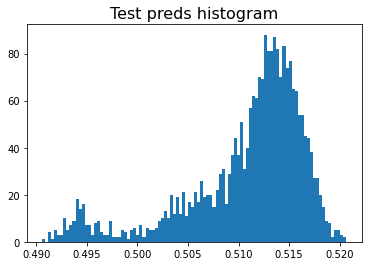

In [ ]:
plt.hist(preds,bins=100)
plt.title('Test preds histogram',size=16)
plt.show()

# Create Submission CSV
There are 2413 rows in test data. Among these, 2336 that are `edit mutations` and 77 are `delete mutations`. Our trained model can only predict `edit mutations`, so will set all `delete mutations` to the mean `edit mutation` prediction below.

In [ ]:
sub = pd.read_csv('../input/novozymes-enzyme-stability-prediction/sample_submission.csv')
sub.tm = preds
sub.loc[sub.seq_id.isin(deletions),'tm'] = sub.loc[~sub.seq_id.isin(deletions),'tm'].mean()
sub.head()

,seq_id,tm
0,31390,0.502892
1,31391,0.509391
2,31392,0.510849
3,31393,0.517013
4,31394,0.514814


In [ ]:
sub.to_csv('submission_single_model_lgbm.csv',index=False)

# Ensemble

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn import model_selection
from sklearn import preprocessing
from sklearn import feature_extraction
from sklearn.linear_model import Ridge,LinearRegression
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
import warnings
import os
warnings.simplefilter('ignore')
import pickle
import os
SEED = 42
N_FOLDS = 10

In [ ]:
train_df = train
test_df = test
ss = pd.read_csv(config.submit)

NameError: name 'config' is not defined